In [1]:
from lexicalrichness import LexicalRichness
import lexicalrichness
lexicalrichness.__version__

'0.4.0'

In [2]:
# Enter your own text here if you prefer
text = """Measure of textual lexical diversity, computed as the mean length of sequential words in
                a text that maintains a minimum threshold TTR score.

                Iterates over words until TTR scores falls below a threshold, then increase factor
                counter by 1 and start over. McCarthy and Jarvis (2010, pg. 385) recommends a factor
                threshold in the range of [0.660, 0.750].
                (McCarthy 2005, McCarthy and Jarvis 2010)"""

# instantiate new text object (use the tokenizer=blobber argument to use the textblob tokenizer)
lex = LexicalRichness(text)

### Attributes

In [3]:
# Get list of words
list_of_words = lex.wordlist
print(list_of_words[:10], list_of_words[-10:])

['measure', 'of', 'textual', 'lexical', 'diversity', 'computed', 'as', 'the', 'mean', 'length'] ['factor', 'threshold', 'in', 'the', 'range', 'of', 'mccarthy', 'mccarthy', 'and', 'jarvis']


In [4]:
# Return word count (w).
lex.words

57

In [5]:
# Return (unique) word count (t).
lex.terms

39

**Type-token ratio** (TTR; Chotlos 1944, Templin 1957):
$$
TTR = \frac{t}{w}
$$
where $t$ or $t(w)$ is the number unique terms as function of the text of length $w$ words. 

In [6]:
# Return type-token ratio (TTR) of text.
lex.ttr

0.6842105263157895

**Root TTR** (RTTR; Guiraud 1954, 1960):
$$
RTTR = \frac{t}{\sqrt{w}}
$$

In [7]:
# Return root type-token ratio (RTTR) of text.
lex.rttr

5.165676192553671

**Corrected TTR** (RTTR; Guiraud 1954, 1960):
$$
CTTR = \frac{t}{\sqrt{2w}}
$$

In [8]:
# Return corrected type-token ratio (CTTR) of text.
lex.cttr

3.6526846651686067

**Herdan's C** (Herdan 1960, 1964):
$$
C = \frac{log(t)}{log(w)}
$$

In [9]:
# Return Herdan's C
lex.Herdan

0.9061378160786574

**Summer's index** (Summer 1966)
$$
Summer = \frac{log \log(t)}{log\log(w)}
$$

In [10]:
# Return Summer's index
lex.Summer

0.9294460323356605

**Dugast's index** (Dugast 1978):
$$
Dugast = \frac{log(w)^2}{log(w) - log (t)}
$$

In [11]:
# Return Dugast's index
lex.Dugast

43.074336212149774

**Maas's index** (Maas 1972):
$$
Maas = \frac{log(w) - log(t)}{log(w)^2}  
$$

In [12]:
lex.Maas

0.023215679867353005

**Yule's K** (Yule 1944, Tweedie and Baayen 1998):
$$
k = 10^4 \times \left\{\sum_{i=1}^n f(i,N) \left(\frac{i}{N}\right)^2 -\frac{1}{N} \right\}
$$

In [13]:
lex.yulek

153.8935056940597

**Yule's I** (Yule 1944, Tweedie and Baayen 1998):
$$
I = \frac{t^2}{\sum^{n_{\text{max}}}_{i=1} i^2f(i,w) - t}
$$

In [14]:
lex.yulei

22.36764705882353

**Herdan's Vm** (Herdan 1955, Tweedie and Baayen 1998):
$$
V_m = \sqrt{\sum^{n_{\text{max}}}_{i=1} f(i,w) \left(\frac{i}{w} \right)^2 - \frac{1}{w}}    
$$

In [15]:
lex.herdanvm

0.08539428890448784

**Simpson's D** (Simpson 1949, Tweedie and Baayen 1998):
$$
D = \sum^{n_{\text{max}}}_{i=1} f(i,w) \frac{i}{w}\frac{i-1}{w-1}
$$

In [16]:
lex.simpsond

0.015664160401002505

### Methods

#### MSTTR: Mean segmental type-token ratio

* computed as average of TTR scores for segments in a text
* Split a text into segments of length segment_window. For each segment, compute the TTR. MSTTR score is the sum of these scores divided by the number of segments
* (Johnson 1944)

In [17]:
lex.msttr(
    segment_window=25  # size of each segment
)

0.88

#### MATTR: Moving average type-token ratio
* Computed using the average of TTRs over successive segments of a text
* Then take the average of all window's TTR
* (Covington 2007, Covington and McFall 2010)

In [18]:
# Return moving average type-token ratio (MATTR).
lex.mattr(
    window_size=25  # Size of each sliding window
)

0.8351515151515151

#### MTLD: Measure of Lexical Diversity

* Computed as the mean length of sequential words in a text that maintains a minimum threshold TTR score
* Iterates over words until TTR scores falls below a threshold, then increase factor counter by 1 and start over
* (McCarthy 2005, McCarthy and Jarvis 2010)

In [19]:
lex.mtld(
    # Factor threshold for MTLD. 
    # Algorithm skips to a new segment when TTR goes below the threshold
    threshold=0.72  
)

46.79226361031519

#### voc-D
* Vocd score of lexical diversity derived from a series of TTR samplings and curve fittings
* *Step 1*: Take 100 random samples of 35 words from the text. Compute the mean TTR from the 100 samples
* *Step 2*: Repeat this procedure for samples of 36 words, 37 words, and so on, all the way to ntokens (recommended as 50 [default]). In each iteration, compute the TTR. Then get the mean TTR over the different number of tokens. So now we have an array of averaged TTR values for ntoken=35, ntoken=36,..., and so on until ntoken=50
* *Step 3*: Find the best-fitting curve from the empirical function of TTR to word size (ntokens). The value of D that provides the best fit is the vocd score
* *Step 4*: Repeat steps 1 to 3 for x number (default=3) of times before averaging D, which is the returned value

In [20]:
lex.vocd(
    ntokens=50,  # Maximum number for the token/word size in the random samplings
    within_sample=100,  # Number of samples
    iterations=3,  # Number of times to repeat steps 1 to 3 before averaging
    seed=42  # Seed for reproducibility
)

46.27679899103406

In [21]:
lex.vocd()

46.27679899103406

#### voc-D plot utility
* Utility to plot empirical voc-D curve and the best fitting line

<AxesSubplot:xlabel='Sample size', ylabel='TTR'>

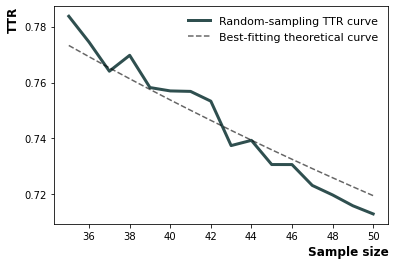

In [22]:
lex.vocd_fig(
    ntokens=50,  # Maximum number for the token/word size in the random samplings
    within_sample=100,  # Number of samples
    seed=42,  # Seed for reproducibility
    savepath="images/vocd.png",
)

#### HD-D
* Hypergeometric distribution diversity (HD-D) score
* (McCarthy and Jarvis 2007)

In [23]:
lex.hdd(
    draws=42  # Number of random draws in the hypergeometric distribution
)

0.7468703323966486